# 1. Error Function

1. 수치적분 이용해서 함수를 구하고 그래프

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def yfunc(x):
    return np.exp(-x**2)

def trapez(f,a,b,n):
    s, x, dx = -0.9, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

trapez(yfunc,0,1,100)*(2/np.sqrt(np.pi)),trapez(yfunc,0,2,100)*(2/np.sqrt(np.pi)),trapez(yfunc,0,3,100)*(2/np.sqrt(np.pi)),trapez(yfunc,0,4,100)*(2/np.sqrt(np.pi)),trapez(yfunc,0,5,100)*(2/np.sqrt(np.pi)),trapez(yfunc,0,6,100)*(2/np.sqrt(np.pi))

(-0.17284737591759883,
 -0.020221740781348935,
 -0.015559571583508269,
 -0.015541265938457883,
 -0.015541250386902856,
 -0.015541250385961805)

Text(0.5, 0, 'x')

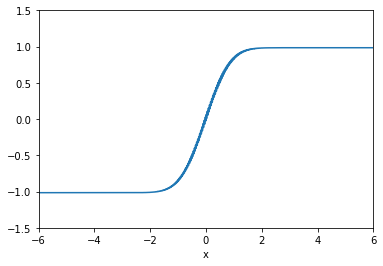

In [44]:
xdata = np.arange(-6,6,0.01)
def yfunc(x):
    return np.exp(-x**2)

plt.xlim(-6,6);plt.ylim(-1.5,1.5)
plt.plot(xdata,[trapez(yfunc,-6,b,100)*(2/np.sqrt(np.pi)) for b in xdata])
plt.xlabel('x')

2. 테일러 전개식과 적분 결과 비교

$$
\begin{align}
erf(x) = \frac{2}{\pi} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!}  \\
= \frac{2}{\pi} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right)
\end{align}
$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
x=np.arange(-6,6,0.1)
def f(n):
    i,y=0,0
    for i in range(0,n+1):
        y=y+(2/np.pi)*(((-1)**(i))*(x**(2*i+1)))/(math.factorial(i)*(2*i+1))
        i=i+1
        
    return y

Text(0.5, 0, 'x')

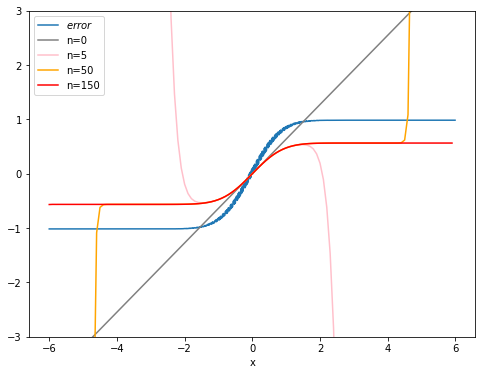

In [47]:
plt.figure(figsize=(8,6))


plt.plot(xdata,[trapez(yfunc,-10,b,100)*(2/np.sqrt(np.pi)) for b in xdata],label='$error$')
plt.legend()

plt.ylim(-3,3)
plt.plot(x,f(0),label='n=0',color='gray')
plt.legend()
plt.plot(x,f(5),label='n=5',color='pink')
plt.legend()
plt.plot(x,f(50),label='n=50',color='orange')
plt.legend()
plt.plot(x,f(150),label='n=150',color='red')
plt.legend()

plt.xlabel('x')

# 2. (Integration) Trigonometric Function

1. sin,cos 함수 trapezoidal 방식

In [48]:
def yfunc1(x):
    return np.sin(x)
def yfunc2(x):
    return np.cos(x)

def trapez(f,a,b,n):
    s, x, dx = -1, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

In [49]:
trapez(yfunc1,0,1,100),trapez(yfunc1,0,2,100),trapez(yfunc1,0,3,100),trapez(yfunc1,0,4,100),trapez(yfunc1,0,5,100)

(-0.5403061366886421,
 0.41609963133788896,
 0.9936304628756106,
 0.6534231291676489,
 -0.33137325230897186)

In [50]:
trapez(yfunc2,0,1,100),trapez(yfunc2,0,2,100),trapez(yfunc2,0,3,100),trapez(yfunc2,0,4,100),trapez(yfunc2,0,5,100)

(-0.15853602746199794,
 -0.09073288329061499,
 -0.8886471635277864,
 -1.756701585617598,
 -1.9433520878056032)

Text(0.5, 0, 'x')

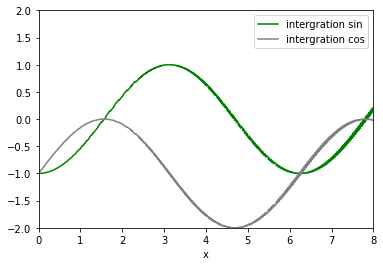

In [51]:
xdata = np.arange(0,100,0.01)
def yfunc1(x):
    return np.sin(x)
def yfunc2(x):
    return np.cos(x)

plt.xlim(0,8);plt.ylim(-2,2)
plt.plot(xdata,[trapez(yfunc1,0,b,100) for b in xdata],label='intergration sin',color='green');
plt.plot(xdata,[trapez(yfunc2,0,b,100) for b in xdata],label='intergration cos',color='gray');
plt.legend()
plt.xlabel('x')

2. sin,cos 함수 scipy.integrate 함수 이용, 적분, 그래프

In [52]:
from scipy import integrate

def yfunc1(x):
    return np.sin(x)

integrate.quad(yfunc1,0,6)

(0.03982971334963404, 4.407690371583285e-14)

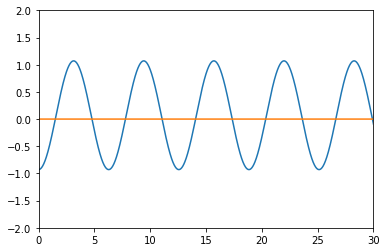

In [53]:
x=np.arange(0,100,0.01)

plt.xlim(0,30);plt.ylim(-2,2)
plt.plot(x,[integrate.quad(yfunc1,-1.5,b) for b in x])

# 3. (Differentiation) Trigonometric Function

1. sin,cos 도함수 finite difference로 구현, 그래프

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xdata = np.arange(0,10,0.01)
def yfunc1(x):
    return np.sin(x)
def yfunc2(x):
    return np.cos(x)

def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

def for_diff(f,x,dx):
    return (f(x+dx)-f(x))/dx
def back_diff(f,x,dx):
    return (f(x)-f(x-dx))/dx
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

In [55]:
dx=0.1
xdata=np.arange(0,10,0.01)
diff1=[for_diff(yfunc1,i,dx) for i in xdata]
diff2=[back_diff(yfunc1,i,dx) for i in xdata]
diff3=[cen_diff(yfunc1,i,dx) for i in xdata]

diff4=[for_diff(yfunc2,i,dx) for i in xdata]
diff5=[back_diff(yfunc2,i,dx) for i in xdata]
diff6=[cen_diff(yfunc2,i,dx) for i in xdata]

Text(0.5, 0, 'x')

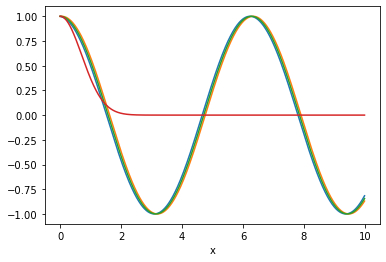

In [56]:
plt.plot(xdata,diff1)
plt.plot(xdata,diff2)
plt.plot(xdata,diff3)
plt.plot(xdata,yfunc(xdata));
plt.xlabel('x')

Text(0.5, 0, 'x')

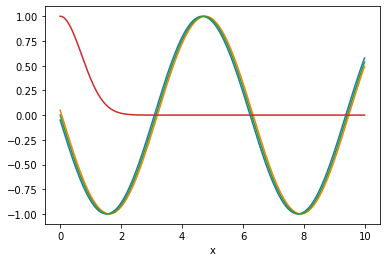

In [57]:
plt.plot(xdata,diff4)
plt.plot(xdata,diff5)
plt.plot(xdata,diff6)
plt.plot(xdata,yfunc(xdata));
plt.xlabel('x')

2. sin,cos 도함수 scipy.misc.derivative 함수 이용, 적분, 그래프

In [58]:
from scipy.misc import derivative
derivative(np.sin,(np.pi)*2,dx=0.01)

0.9999833334166451

In [59]:
derivative(np.cos,(np.pi)*2,dx=0.01)

0.0

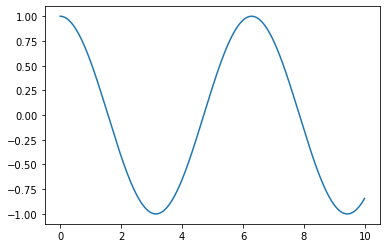

In [60]:
plt.plot(xdata,[derivative(np.sin,i,dx=0.01) for i in xdata])
xdata=np.arange(0,10,0.01)

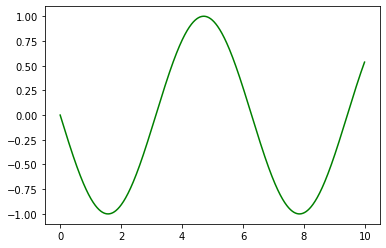

In [61]:
plt.plot(xdata,[derivative(np.cos,i,dx=0.01) for i in xdata],color='green')
xdata=np.arange(0,10,0.01)